In [2]:
"""
Lottery Number Analysis Script
------------------------------
This script analyzes lottery draw data to identify the most frequent combinations
of numbers including pairs, triplets, and quads. 

Usage:
    Import this script in a Jupyter notebook:
    ```
    import lottery_analysis as la
    ```
    
    Then use the functions directly:
    ```
    # Analyze a lottery file
    la.analyze_lottery_data('draws250520.txt')
    ```
"""

In [3]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Set default plot styles
plt.style.use('ggplot')
sns.set_palette('viridis')

Total number of draws found: 118

Sample draws:
Draw 1: [8, 10, 22, 33, 37]
Draw 2: [7, 10, 24, 29, 35]
Draw 3: [10, 11, 26, 28, 39]
Draw 4: [6, 7, 23, 34, 36]
Draw 5: [5, 7, 26, 34, 36]

Top 15 Pairs:
1. Pair 4,37: appeared 11 times
2. Pair 4,25: appeared 11 times
3. Pair 13,24: appeared 10 times
4. Pair 2,39: appeared 10 times
5. Pair 24,37: appeared 9 times
6. Pair 25,36: appeared 9 times
7. Pair 2,19: appeared 9 times
8. Pair 10,33: appeared 8 times
9. Pair 22,33: appeared 8 times
10. Pair 26,39: appeared 8 times
11. Pair 25,33: appeared 8 times
12. Pair 4,33: appeared 8 times
13. Pair 25,37: appeared 8 times
14. Pair 1,26: appeared 8 times
15. Pair 26,33: appeared 8 times

Top 15 Triplets:
1. Triplet 4,25,37: appeared 7 times
2. Triplet 1,26,38: appeared 5 times
3. Triplet 13,24,38: appeared 5 times
4. Triplet 13,24,37: appeared 4 times
5. Triplet 4,25,33: appeared 4 times
6. Triplet 1,26,33: appeared 4 times
7. Triplet 25,33,36: appeared 4 times
8. Triplet 24,37,38: appeared 4 ti

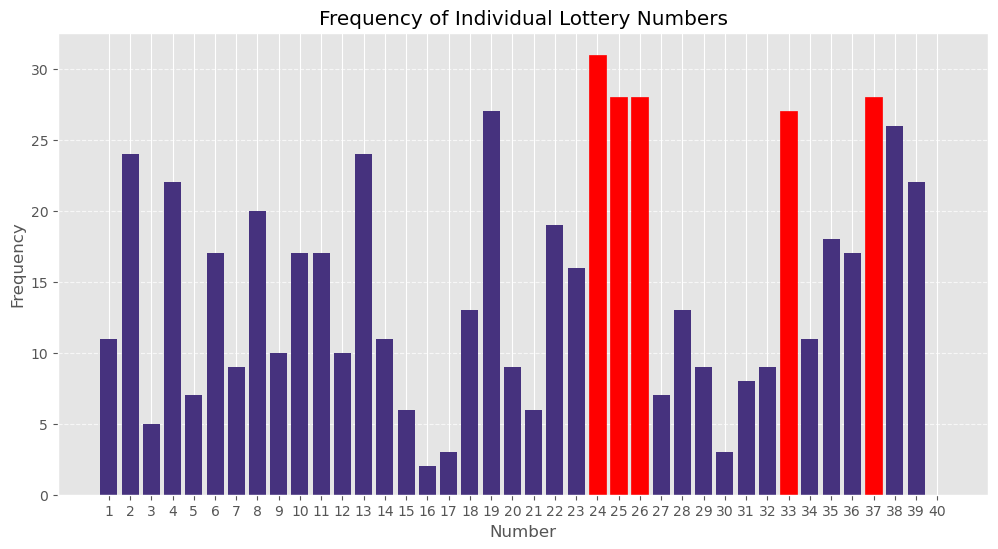

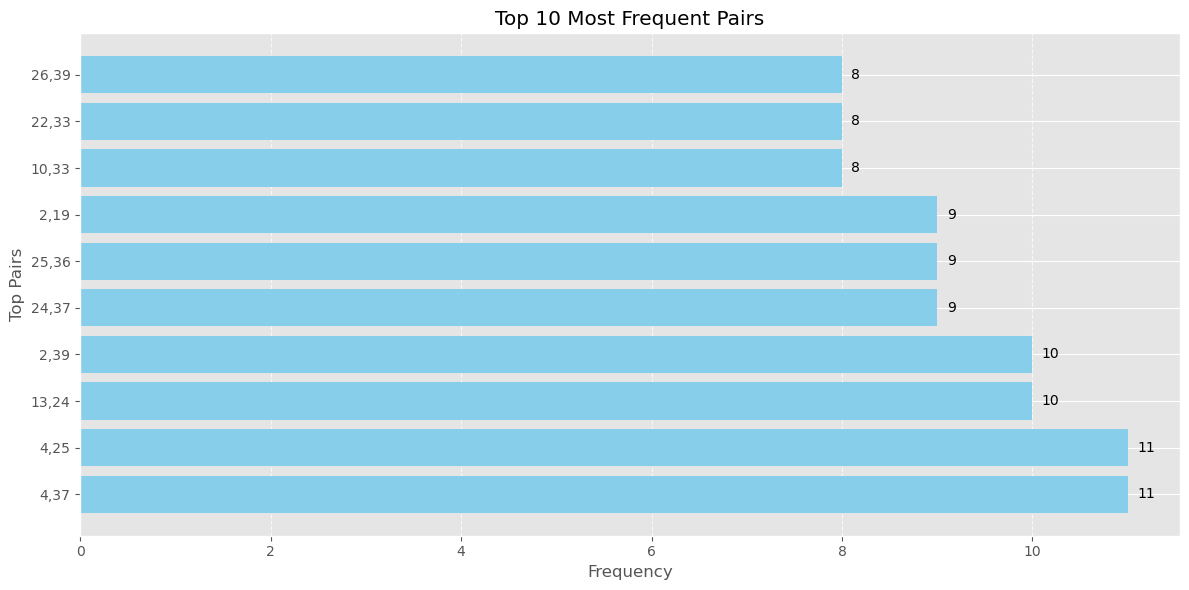

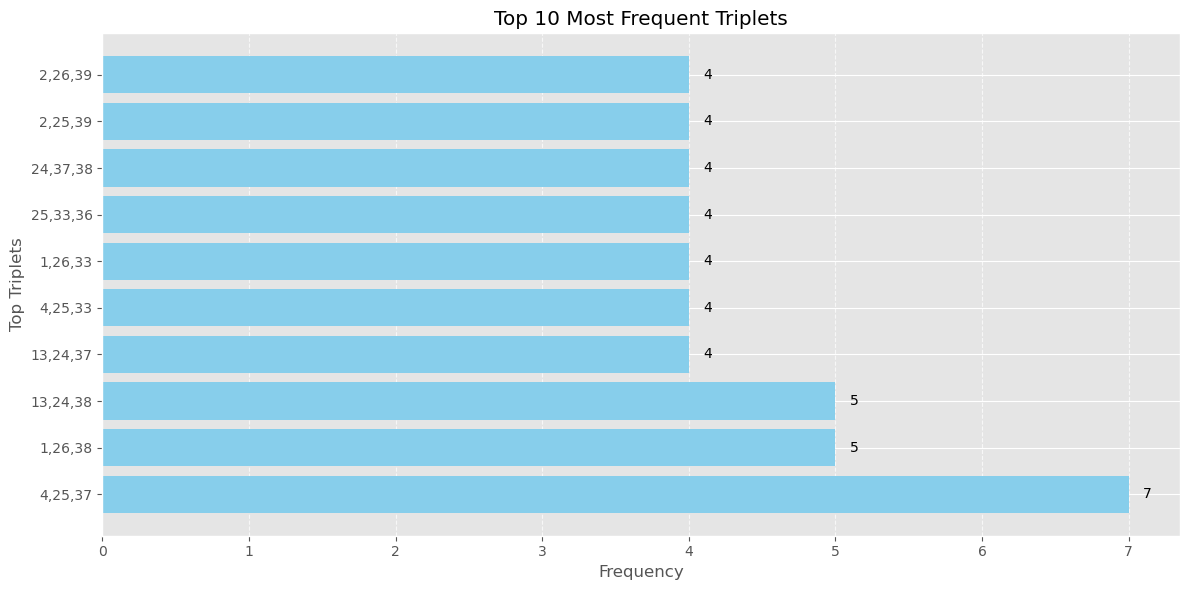

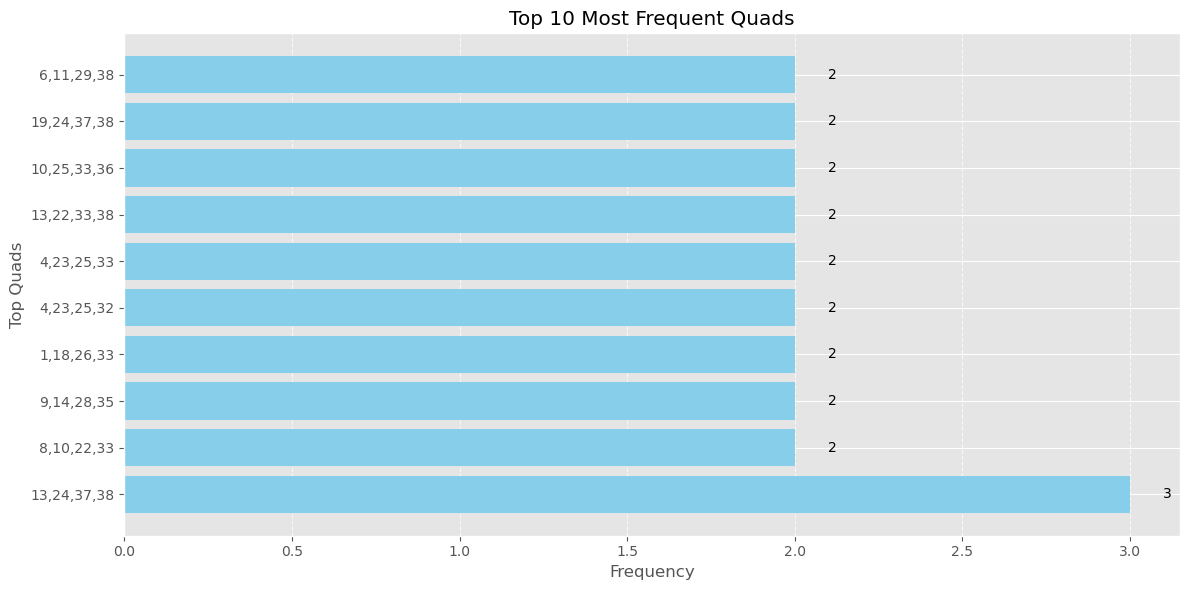

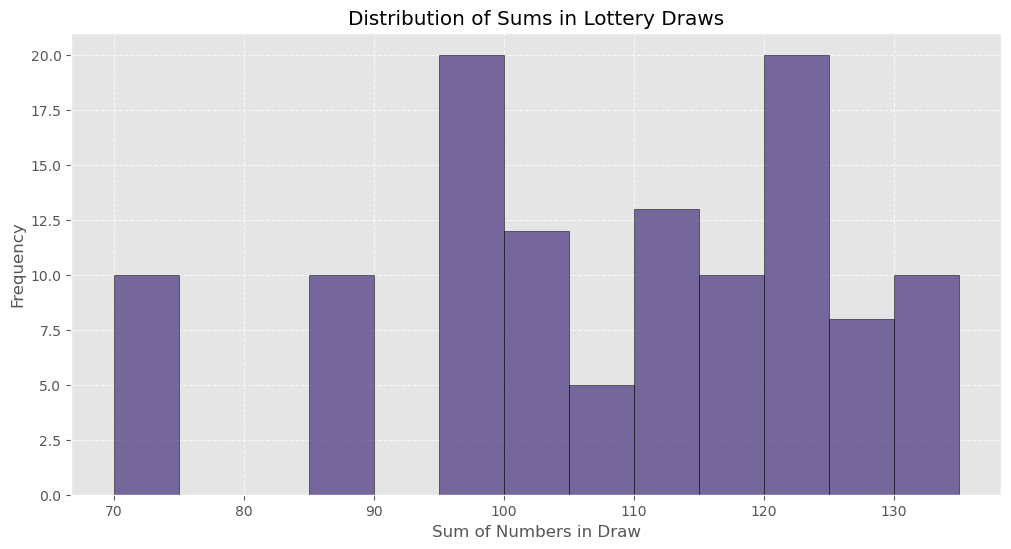

Average sum: 106.51
Median sum: 110.0
Most common sum: 110
Sum range: 70 to 133


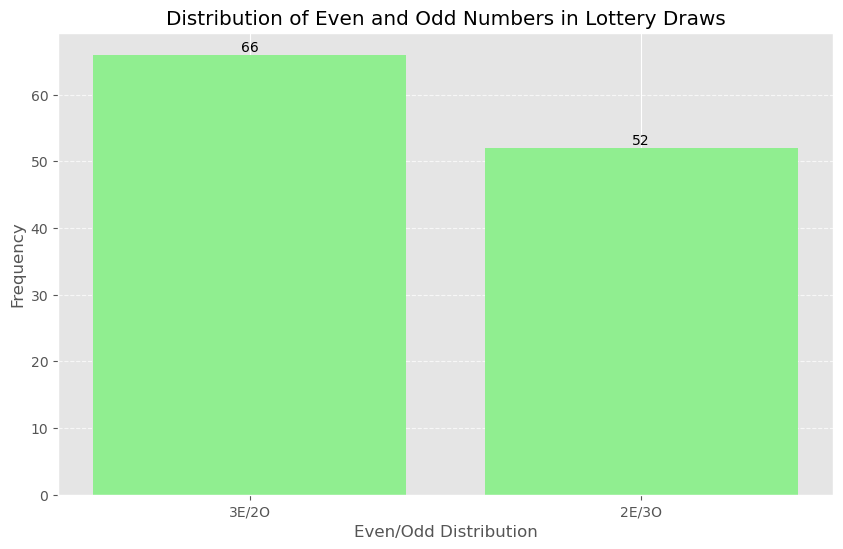

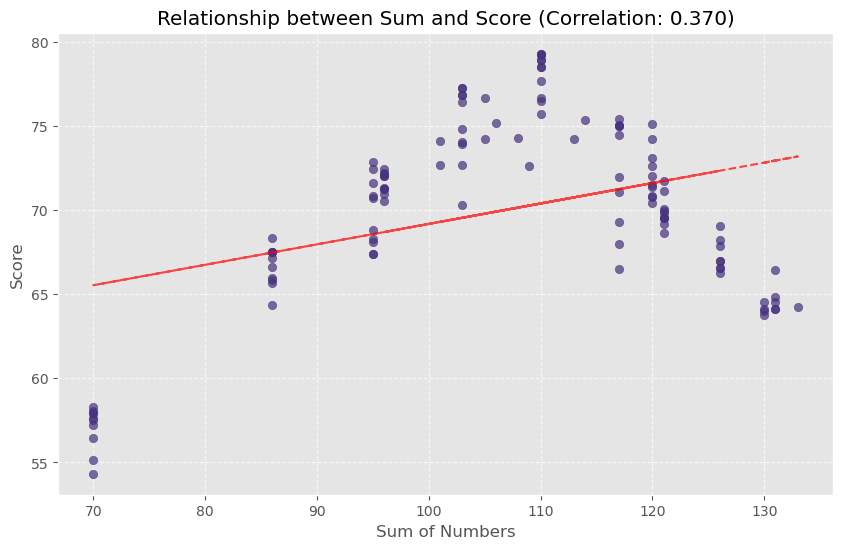

In [5]:
def extract_numbers_from_data(file_path):
    """Extract lottery number sets from the data file."""
    with open(file_path, 'r') as file:
        data = file.read()
    
    number_sets = []
    lines = data.split('\n')
    
    for line in lines:
        # Look for lines that start with a number followed by numbers in format "X X X X X"
        match = re.match(r'^\d+\s+(\d+\s+\d+\s+\d+\s+\d+\s+\d+)', line)
        if match:
            numbers = [int(num) for num in match.group(1).split()]
            if len(numbers) == 5:
                number_sets.append(numbers)
    
    return number_sets

def extract_draw_details(file_path):
    """Extract more detailed information from each draw."""
    with open(file_path, 'r') as file:
        data = file.read()
    
    draws = []
    lines = data.split('\n')
    
    for line in lines:
        # Look for lines with numbers, score, sum, and E/O pattern
        match = re.match(r'^\d+\s+(\d+\s+\d+\s+\d+\s+\d+\s+\d+)\s+(\d+\.\d+)\s+(\d+)\s+(\d+/\d+)', line)
        if match:
            numbers = [int(num) for num in match.group(1).split()]
            score = float(match.group(2))
            sum_value = int(match.group(3))
            eo_ratio = match.group(4)
            
            draws.append({
                'numbers': numbers,
                'score': score,
                'sum': sum_value,
                'eo_ratio': eo_ratio
            })
    
    return draws

def count_combinations(number_sets, k):
    """Count the frequency of k-combinations in the number sets."""
    combination_counts = Counter()
    
    for number_set in number_sets:
        # Generate all possible k-combinations
        for combo in combinations(sorted(number_set), k):
            combination_counts[combo] += 1
    
    return combination_counts

def display_top_combinations(combo_counts, k, n=15):
    """Display the top n most frequent k-combinations."""
    top_combos = combo_counts.most_common(n)
    combo_name = {2: 'Pair', 3: 'Triplet', 4: 'Quad'}[k]
    
    print(f"\nTop {n} {combo_name}s:")
    for i, (combo, count) in enumerate(top_combos, 1):
        combo_str = ','.join(map(str, combo))
        print(f"{i}. {combo_name} {combo_str}: appeared {count} times")
    
    return top_combos

def plot_number_frequency(number_frequency, max_number=40):
    """Plot the frequency of individual numbers."""
    frequencies = [number_frequency.get(i, 0) for i in range(1, max_number + 1)]
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(1, max_number + 1), frequencies)
    
    # Highlight the top 5 most frequent numbers
    top_numbers = [num for num, _ in number_frequency.most_common(5)]
    for i in range(max_number):
        if i + 1 in top_numbers:
            bars[i].set_color('red')
    
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.title('Frequency of Individual Lottery Numbers')
    plt.xticks(range(1, max_number + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_top_combinations(combo_counts, k, n=10):
    """Plot the top n most frequent k-combinations."""
    top_combos = combo_counts.most_common(n)
    combo_name = {2: 'Pairs', 3: 'Triplets', 4: 'Quads'}[k]
    
    labels = [','.join(map(str, combo)) for combo, _ in top_combos]
    values = [count for _, count in top_combos]
    
    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(f'Top {combo_name}')
    plt.title(f'Top {n} Most Frequent {combo_name}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add frequency values at the end of each bar
    for i, v in enumerate(values):
        plt.text(v + 0.1, i, str(v), verticalalignment='center')
        
    plt.tight_layout()
    plt.show()

def analyze_draw_properties(number_sets):
    """Analyze properties like sum and even/odd distribution of draws."""
    sums = [sum(numbers) for numbers in number_sets]
    even_odd_counts = [(len([n for n in numbers if n % 2 == 0]), 
                       len([n for n in numbers if n % 2 != 0])) 
                      for numbers in number_sets]
    
    return sums, even_odd_counts

def plot_sum_distribution(sums):
    """Plot the distribution of sums in lottery draws."""
    plt.figure(figsize=(12, 6))
    plt.hist(sums, bins=range(min(sums), max(sums) + 5, 5), edgecolor='black', alpha=0.7)
    plt.xlabel('Sum of Numbers in Draw')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sums in Lottery Draws')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()
    
    # Calculate and print statistics about sums
    print(f"Average sum: {np.mean(sums):.2f}")
    print(f"Median sum: {np.median(sums)}")
    print(f"Most common sum: {pd.Series(sums).value_counts().index[0]}")
    print(f"Sum range: {min(sums)} to {max(sums)}")

def plot_even_odd_distribution(even_odd_counts):
    """Plot the distribution of even/odd patterns in lottery draws."""
    even_odd_distribution = Counter(even_odd_counts)
    labels = [f"{even}E/{odd}O" for even, odd in even_odd_distribution.keys()]
    values = list(even_odd_distribution.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='lightgreen')
    plt.xlabel('Even/Odd Distribution')
    plt.ylabel('Frequency')
    plt.title('Distribution of Even and Odd Numbers in Lottery Draws')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add frequency values on top of each bar
    for i, v in enumerate(values):
        plt.text(i, v + 0.5, str(v), ha='center')
        
    plt.show()

def plot_score_sum_correlation(detailed_draws):
    """Plot the correlation between score and sum."""
    if detailed_draws and 'score' in detailed_draws[0]:
        scores = [draw['score'] for draw in detailed_draws]
        sums = [draw['sum'] for draw in detailed_draws]
        
        # Calculate correlation
        correlation = np.corrcoef(scores, sums)[0, 1]
        
        # Plot the relationship
        plt.figure(figsize=(10, 6))
        plt.scatter(sums, scores, alpha=0.7)
        
        # Add trend line
        z = np.polyfit(sums, scores, 1)
        p = np.poly1d(z)
        plt.plot(sums, p(sums), "r--", alpha=0.7)
        
        plt.xlabel('Sum of Numbers')
        plt.ylabel('Score')
        plt.title(f'Relationship between Sum and Score (Correlation: {correlation:.3f})')
        plt.grid(linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Score information not available in the data.")

def analyze_lottery_data(file_path, show_plots=True):
    """Complete analysis of lottery data from file."""
    # Load data
    number_sets = extract_numbers_from_data(file_path)
    detailed_draws = extract_draw_details(file_path)
    
    # Basic information
    print(f"Total number of draws found: {len(number_sets)}")
    print("\nSample draws:")
    for i in range(min(5, len(number_sets))):
        print(f"Draw {i+1}: {number_sets[i]}")
    
    # Count combinations
    pair_counts = count_combinations(number_sets, 2)
    triplet_counts = count_combinations(number_sets, 3)
    quad_counts = count_combinations(number_sets, 4)
    
    # Count individual number frequencies
    number_frequency = Counter()
    for number_set in number_sets:
        number_frequency.update(number_set)
    
    # Display top combinations
    top_pairs = display_top_combinations(pair_counts, 2)
    top_triplets = display_top_combinations(triplet_counts, 3)
    top_quads = display_top_combinations(quad_counts, 4)
    
    # Display statistics
    print(f"\nUnique pairs found: {len(pair_counts)}")
    print(f"Unique triplets found: {len(triplet_counts)}")
    print(f"Unique quads found: {len(quad_counts)}")
    
    # Display top individual numbers
    top_numbers = number_frequency.most_common(10)
    print("\nMost frequent individual numbers:")
    for i, (number, count) in enumerate(top_numbers, 1):
        print(f"{i}. Number {number}: appeared {count} times")
    
    # Analyze draw properties
    sums, even_odd_counts = analyze_draw_properties(number_sets)
    
    if show_plots:
        # Plot visualizations
        plot_number_frequency(number_frequency)
        plot_top_combinations(pair_counts, 2)
        plot_top_combinations(triplet_counts, 3)
        plot_top_combinations(quad_counts, 4)
        plot_sum_distribution(sums)
        plot_even_odd_distribution(even_odd_counts)
        plot_score_sum_correlation(detailed_draws)
    
    # Return all the data for further analysis if needed
    return {
        'number_sets': number_sets,
        'detailed_draws': detailed_draws,
        'pair_counts': pair_counts,
        'triplet_counts': triplet_counts,
        'quad_counts': quad_counts,
        'number_frequency': number_frequency,
        'sums': sums,
        'even_odd_counts': even_odd_counts
    }

# Example usage
if __name__ == "__main__":
    analyze_lottery_data('draws250520.txt')